In [3]:
"""Plotting referendum results in pandas.

In short, we want to make beautiful map to report results of a referendum. In
some way, we would like to depict results with something similar to the maps
that you can find here:
https://github.com/x-datascience-datacamp/datacamp-assignment-pandas/blob/main/example_map.png

To do that, you will load the data as pandas.DataFrame, merge the info and
aggregate them by regions and finally plot them on a map using `geopandas`.
"""
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [53]:
def load_data():
    """Load data from the CSV files referundum/regions/departments.
    referendum = pd.DataFrame({})
    regions = pd.DataFrame({})
    departments = pd.DataFrame({})"""
    referendum = pd.read_csv('data/referendum.csv', sep=';')
    regions = pd.read_csv('data/regions.csv', sep=',')
    departments = pd.read_csv('data/departments.csv', sep=',')

    return referendum, regions, departments

In [54]:
referendum, regions, departments = load_data()

In [55]:
referendum

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52
...,...,...,...,...,...,...,...,...,...
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503


In [56]:
regions

,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte
5,6,11,Île-de-France,ile de france
6,7,24,Centre-Val de Loire,centre val de loire
7,8,27,Bourgogne-Franche-Comté,bourgogne franche comte
8,9,28,Normandie,normandie
9,10,32,Hauts-de-France,hauts de france


In [57]:
departments

,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes
...,...,...,...,...,...
104,105,COM,984,Terres australes et antarctiques françaises,terres australes et antarctiques francaises
105,106,COM,986,Wallis et Futuna,wallis et futuna
106,107,COM,987,Polynésie française,polynesie francaise
107,108,COM,988,Nouvelle-Calédonie,nouvelle caledonie


In [58]:
def merge_regions_and_departments(regions, departments):
    """Merge regions and departments in one DataFrame.

    The columns in the final DataFrame should be:
    ['code_reg', 'name_reg', 'code_dep', 'name_dep']
    """
    df1 = pd.merge(regions, departments, left_on='code', right_on='region_code')
    df2 = df1[['region_code', 'name_x', 'code_y', 'name_y']]
    reg_dep = df2.rename(columns={'region_code': 'code_reg', 'name_x': 'name_reg',
                              'code_y': 'code_dep', 'name_y': 'name_dep'})
    return reg_dep

In [59]:
reg_dep = merge_regions_and_departments(regions, departments)
reg_dep

,code_reg,name_reg,code_dep,name_dep
0,01,Guadeloupe,971,Guadeloupe
1,02,Martinique,972,Martinique
2,03,Guyane,973,Guyane
3,04,La Réunion,974,La Réunion
4,06,Mayotte,976,Mayotte
...,...,...,...,...
104,COM,Collectivités d'Outre-Mer,984,Terres australes et antarctiques françaises
105,COM,Collectivités d'Outre-Mer,986,Wallis et Futuna
106,COM,Collectivités d'Outre-Mer,987,Polynésie française
107,COM,Collectivités d'Outre-Mer,988,Nouvelle-Calédonie


In [87]:
def merge_referendum_and_areas(referendum, regions_and_departments):
    """Merge referendum and regions_and_departments in one DataFrame.

    You can drop the lines relative to DOM-TOM-COM departments, and the
    french living abroad.
    """
    
    #df1 = referendum[~referendum['Department code'].str.contains('Z')] # ~ = not
    df1 = referendum[(referendum['Department code'].str.isdigit()) | 
                     (referendum['Department code'] == '2A') | 
                     (referendum['Department code'] == '2B')]
    df1.loc[:, 'Department code'] = df1['Department code'].apply(
        lambda x: x.zfill(2))
    df2 = pd.merge(regions_and_departments, df1,
                   left_on='code_dep', right_on='Department code')
    return df2

In [88]:
ref_are = merge_referendum_and_areas(referendum, reg_dep)
ref_are

,code_reg,name_reg,code_dep,name_dep,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,11,Île-de-France,75,Paris,75,PARIS,56,Paris,1253322,248755,12093,506594,485880
1,11,Île-de-France,77,Seine-et-Marne,77,SEINE ET MARNE,1,Achères-la-Forêt,906,148,15,224,519
2,11,Île-de-France,77,Seine-et-Marne,77,SEINE ET MARNE,2,Amillis,553,94,8,121,330
3,11,Île-de-France,77,Seine-et-Marne,77,SEINE ET MARNE,3,Amponville,277,36,1,75,165
4,11,Île-de-France,77,Seine-et-Marne,77,SEINE ET MARNE,4,Andrezel,266,44,3,76,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36560,94,Corse,2B,Haute-Corse,2B,HAUTE CORSE,356,Zalana,200,52,6,56,86
36561,94,Corse,2B,Haute-Corse,2B,HAUTE CORSE,361,Zilia,221,45,0,57,119
36562,94,Corse,2B,Haute-Corse,2B,HAUTE CORSE,364,Zuani,75,15,1,18,41
36563,94,Corse,2B,Haute-Corse,2B,HAUTE CORSE,365,San-Gavino-di-Fiumorbo,296,86,4,138,68


In [89]:
def compute_referendum_result_by_regions(referendum_and_areas):
    """Return a table with the absolute count for each region.

    The return DataFrame should be indexed by `code_reg` and have columns:
    ['name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B']
    """
    
    result_by_region = referendum_and_areas.groupby('code_reg').agg({
        'name_reg': 'first',
        'Registered': 'sum',
        'Abstentions': 'sum',
        'Null': 'sum',
        'Choice A': 'sum',
        'Choice B': 'sum'
    }).reset_index()

    result_by_region.set_index('code_reg', inplace=True)

    return result_by_region

In [90]:
res_reg = compute_referendum_result_by_regions(ref_are)
res_reg

,name_reg,Registered,Abstentions,Null,Choice A,Choice B
code_reg,,,,,,
11,Île-de-France,6942361,1515884,85997,2536620,2803860
24,Centre-Val de Loire,1801366,326560,28827,590890,855089
27,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687
28,Normandie,2372779,426075,35513,816972,1094219
32,Hauts-de-France,4210444,866555,60601,1411257,1872031
44,Grand Est,3857089,783348,56951,1088684,1928106
52,Pays de la Loire,2605438,412509,47677,922468,1222784
53,Bretagne,2380594,364724,36077,944052,1035741
75,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879


In [101]:
def plot_referendum_map(referendum_result_by_regions):
    """Plot a map with the results from the referendum.

    * Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.
    """
    
    geo_data = gpd.read_file('data/regions.geojson')
    
    df1 = pd.merge(geo_data, referendum_result_by_regions, 
                   left_on='code', left_on=
    df1['ratio'] = df1['Choice A'] / (df1['Choice A'] + df1['Choice B'])
    
    df1.plot(column='ratio', legend=True)
    
    return df1
  
    df1 = pd.merge(geo, referendum_result_by_regions,
                   left_on='code', right_index=True)
    df1['ratio'] = df1['Choice A'] / (df1['Choice A'] + df1['Choice B'])
    df1.plot(column='ratio', legend=True, cmap="OrRd")
    return df1

,code,nom,geometry,name_reg,Registered,Abstentions,Null,Choice A,Choice B,ratio
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",Île-de-France,6942361,1515884,85997,2536620,2803860,0.474980
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",Centre-Val de Loire,1801366,326560,28827,590890,855089,0.408644
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687,0.416111
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",Normandie,2372779,426075,35513,816972,1094219,0.427467
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",Hauts-de-France,4210444,866555,60601,1411257,1872031,0.429830
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",Grand Est,3857089,783348,56951,1088684,1928106,0.360875
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",Pays de la Loire,2605438,412509,47677,922468,1222784,0.430004
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",Bretagne,2380594,364724,36077,944052,1035741,0.476844
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879,0.480020
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...",Occitanie,4008516,660914,62732,1528980,1755890,0.465461


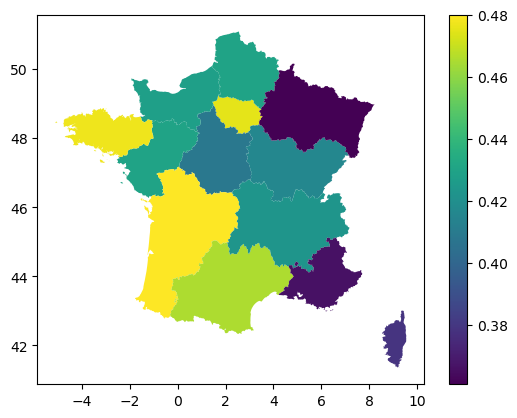

In [102]:
plot_referendum_map(res_reg)

In [ ]:
if __name__ == "__main__":

    referendum, df_reg, df_dep = load_data()
    regions_and_departments = merge_regions_and_departments(
        df_reg, df_dep
    )
    referendum_and_areas = merge_referendum_and_areas(
        referendum, regions_and_departments
    )
    referendum_results = compute_referendum_result_by_regions(
        referendum_and_areas
    )
    print(referendum_results)

    plot_referendum_map(referendum_results)
    plt.show()

In [26]:
import numpy as np

def wallis_product(n_terms):
    """Implement the Wallis product to compute an approximation of pi.

    See:
    https://en.wikipedia.org/wiki/Wallis_product

    Parameters
    ----------
    n_terms : int
        Number of steps in the Wallis product. Note that `n_terms=0` will
        consider the product to be `1`.

    Returns
    -------
    pi : float
        The approximation of order `n_terms` of pi using the Wallis product.
    """
    # XXX : The n_terms is an int that corresponds to the number of
    # terms in the product. For example 10000.
    pi = np.arange(1, n_terms + 1)
    print(pi)
    print(4 * pi ** 2)
    print((2 * pi - 1) * (2 * pi + 1))
    print(4 * pi ** 2 / ((2 * pi - 1) * (2 * pi + 1)))
    pi = np.prod(4 * pi ** 2 / ((2 * pi - 1) * (2 * pi + 1)))
    return pi * 2

In [27]:
wallis_product(100)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
[    4    16    36    64   100   144   196   256   324   400   484   576
   676   784   900  1024  1156  1296  1444  1600  1764  1936  2116  2304
  2500  2704  2916  3136  3364  3600  3844  4096  4356  4624  4900  5184
  5476  5776  6084  6400  6724  7056  7396  7744  8100  8464  8836  9216
  9604 10000 10404 10816 11236 11664 12100 12544 12996 13456 13924 14400
 14884 15376 15876 16384 16900 17424 17956 18496 19044 19600 20164 20736
 21316 21904 22500 23104 23716 24336 24964 25600 26244 26896 27556 28224
 28900 29584 30276 30976 31684 32400 33124 33856 34596 35344 36100 36864
 37636 38

3.133787490628162